# XRT Blop Demo

For ophyd beamline setup see: 
- https://github.com/NSLS-II/blop/blob/main/src/blop/sim/xrt_beamline.py
- https://github.com/NSLS-II/blop/blob/main/src/blop/sim/xrt_kb_model.py

The picture below displays beam from geometric source propagating through a pair of toroidal mirrors focusing the beam on screen. Simulation of a KB setup.

![xrt_blop_layout_w.jpg](../_static/xrt_blop_layout_w.jpg)

In [1]:
from blop.utils import prepare_re_env  # noqa

%run -i $prepare_re_env.__file__ --db-type=temp
bec.disable_plots()

In [2]:
import time

from matplotlib import pyplot as plt

from blop import DOF, Agent, Objective
from blop.digestion import beam_stats_digestion
from blop.sim.xrt_beamline import Beamline

In [3]:
plt.ion()

h_opt = 0
dh = 5

R1, dR1 = 40000, 10000
R2, dR2 = 20000, 10000

In [4]:
beamline = Beamline(name="bl")
time.sleep(1)
dofs = [
    DOF(description="KBV R", device=beamline.kbv_dsv, search_domain=(R1 - dR1, R1 + dR1)),
    DOF(description="KBH R", device=beamline.kbh_dsh, search_domain=(R2 - dR2, R2 + dR2)),
]

In [5]:
objectives = [
    Objective(name="bl_det_sum", target="max", transform="log", trust_domain=(20, 1e12)),
    Objective(
        name="bl_det_wid_x",
        target="min",
        transform="log",
        # trust_domain=(0, 1e12),
        latent_groups=[("bl_kbh_dsh", "bl_kbv_dsv")],
    ),
    Objective(
        name="bl_det_wid_y",
        target="min",
        transform="log",
        # trust_domain=(0, 1e12),
        latent_groups=[("bl_kbh_dsh", "bl_kbv_dsv")],
    ),
]

In [6]:
agent = Agent(
    dofs=dofs,
    objectives=objectives,
    detectors=[beamline.det],
    digestion=beam_stats_digestion,
    digestion_kwargs={"image_key": "bl_det_image"},
    verbose=True,
    db=db,
    tolerate_acquisition_errors=False,
    enforce_all_objectives_valid=True,
    train_every=3,
)

In [7]:
RE(agent.learn("qr", n=16))
RE(agent.learn("qei", n=16, iterations=4))

2025-06-19 02:05:06.305 INFO: Executing plan <generator object Agent.learn at 0x7eff1d083ae0>


2025-06-19 02:05:06.309 INFO: Change state on <bluesky.run_engine.RunEngine object at 0x7eff1e5da980> from 'idle' -> 'running'


2025-06-19 02:05:06.311 INFO: running iteration 1 / 1




Transient Scan ID: 1     Time: 2025-06-19 02:05:06

Persistent Unique Scan ID: '0d631cca-6756-4b08-98d7-3cb80b6b184a'

ToroidMirror2

center:

[0, 11000, np.float64(176.32831189648832)]

New stream: 'primary'

+-----------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+

|   seq_num |       time | bl_kbv_dsv | bl_kbh_dsh | bl_det_sum | bl_det_cen_x | bl_det_cen_y | bl_det_wid_x | bl_det_wid_y |

+-----------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+

|         1 | 02:05:06.7 |  31089.002 |  13966.109 |    145.021 |      226.638 |      141.817 |      337.825 |      102.733 |

|         2 | 02:05:06.8 |  34242.315 |  16246.039 |   4719.726 |      215.917 |      151.739 |      246.067 |       66.638 |

|         3 | 02:05:07.0 |  36147.575 |  17899.019 |   4444.829 |      218.083 |      148.995 |      131.467 |       50.575 |

|         4 | 02:05:07.1 |  38474.702 |  20357.231 |  23653.259 |      195.535 |      146.644 |       15.031 |       20.133 |

|         5 | 02:05:07.3 |  31602.994 |  23631.008 |   6562.558 |      203.497 |      155.550 |      100.466 |      116.792 |

|         6 | 02:05:07.4 |  33689.563 |  26507.939 |   5222.120 |      206.000 |      152.161 |      174.867 |       70.647 |

|         7 | 02:05:07.6 |  36856.883 |  29503.691 |   2529.762 |      211.069 |      152.231 |      357.588 |       42.315 |

|         8 | 02:05:07.7 |  40435.996 |  26078.777 |   4638.091 |      206.554 |      152.568 |      196.008 |       52.568 |

|         9 | 02:05:07.8 |  44856.542 |  23826.238 |   8970.462 |      201.308 |      154.810 |      116.366 |       90.161 |

|        10 | 02:05:08.0 |  49797.969 |  28058.611 |    840.513 |      192.771 |      152.312 |      230.292 |       91.125 |

|        11 | 02:05:08.1 |  45533.673 |  22036.538 |   4425.658 |      201.253 |      152.402 |       72.330 |       90.278 |

|        12 | 02:05:08.2 |  47821.419 |  19655.847 |   2177.814 |      195.156 |      154.021 |       56.812 |      107.458 |

|        13 | 02:05:08.4 |  42255.991 |  16362.538 |   5693.061 |      206.000 |      149.166 |      228.467 |       56.860 |

|        14 | 02:05:08.5 |  43075.308 |  13459.439 |    630.661 |      227.963 |      152.625 |      309.825 |       63.625 |

|        15 | 02:05:08.6 |  39144.639 |  11888.620 |   3605.714 |      200.135 |      151.456 |      358.096 |       19.847 |

|        16 | 02:05:08.8 |  47470.852 |  10522.279 |     10.553 |      207.438 |      134.938 |      284.375 |       77.375 |

+-----------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+

generator list_scan ['0d631cca'] (scan num: 1)

2025-06-19 02:05:10.824 INFO: Change state on <bluesky.run_engine.RunEngine object at 0x7eff1e5da980> from 'running' -> 'idle'


2025-06-19 02:05:10.825 INFO: Cleaned up from plan <generator object Agent.learn at 0x7eff1d083ae0>


2025-06-19 02:05:10.827 INFO: Executing plan <generator object Agent.learn at 0x7eff1d083f40>


2025-06-19 02:05:10.829 INFO: Change state on <bluesky.run_engine.RunEngine object at 0x7eff1e5da980> from 'idle' -> 'running'


2025-06-19 02:05:10.830 INFO: running iteration 1 / 4




Transient Scan ID: 2     Time: 2025-06-19 02:05:18

Persistent Unique Scan ID: '05b054c5-38eb-4d71-ba43-c244b7fa76aa'

New stream: 'primary'

+-----------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+

|   seq_num |       time | bl_kbv_dsv | bl_kbh_dsh | bl_det_sum | bl_det_cen_x | bl_det_cen_y | bl_det_wid_x | bl_det_wid_y |

+-----------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+

|         1 | 02:05:18.6 |  42429.867 |  19708.156 |  11654.699 |      203.449 |      144.730 |       40.437 |       59.951 |

|         2 | 02:05:18.7 |  43919.836 |  21753.301 |   8637.988 |      201.593 |      157.504 |       46.172 |       70.439 |

|         3 | 02:05:18.9 |  39868.465 |  24005.008 |   9022.554 |      219.574 |      152.929 |      132.697 |       42.442 |

|         4 | 02:05:19.0 |  39837.312 |  21892.996 |  21712.897 |      205.557 |      157.170 |       43.839 |       32.712 |

|         5 | 02:05:19.1 |  38549.066 |  21820.180 |  23149.385 |      203.848 |      154.350 |       44.841 |       23.629 |

|         6 | 02:05:19.2 |  38454.508 |  21313.816 |  23448.816 |      198.660 |      154.016 |       20.419 |       18.749 |

|         7 | 02:05:19.4 |  38370.699 |  20825.242 |  23698.609 |      193.970 |      149.897 |       14.270 |       18.494 |

|         8 | 02:05:19.5 |  37412.750 |  20772.264 |  23653.340 |      193.257 |      150.421 |       13.732 |       20.312 |

|         9 | 02:05:19.6 |  38405.945 |  20168.102 |  23596.920 |      198.413 |      145.545 |       17.283 |       19.927 |

|        10 | 02:05:19.7 |  38690.227 |  20587.656 |  23479.127 |      193.790 |      148.595 |       14.151 |       20.618 |

|        11 | 02:05:19.9 |  38624.566 |  20914.021 |  23584.498 |      194.254 |      151.142 |       15.692 |       21.135 |

|        12 | 02:05:20.0 |  39248.941 |  20461.297 |  23243.814 |      194.165 |      147.994 |       14.386 |       29.421 |

|        13 | 02:05:20.1 |  39515.621 |  18733.367 |  17154.195 |      211.780 |      148.929 |       87.373 |       33.124 |

|        14 | 02:05:20.2 |  37783.906 |  17929.766 |  11844.325 |      220.417 |      146.146 |      140.433 |       18.744 |

|        15 | 02:05:20.4 |  36457.328 |  18322.871 |   7958.692 |      211.212 |      149.814 |      116.358 |       40.789 |

|        16 | 02:05:20.5 |  35736.676 |  17140.906 |   2088.579 |      206.060 |      150.522 |      192.270 |       58.967 |

+-----------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+

generator list_scan ['05b054c5'] (scan num: 2)

2025-06-19 02:05:22.089 INFO: running iteration 2 / 4




Transient Scan ID: 3     Time: 2025-06-19 02:05:29

Persistent Unique Scan ID: 'f74cb22f-db34-4f47-b300-e3f7b51dd7dc'

New stream: 'primary'

+-----------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+

|   seq_num |       time | bl_kbv_dsv | bl_kbh_dsh | bl_det_sum | bl_det_cen_x | bl_det_cen_y | bl_det_wid_x | bl_det_wid_y |

+-----------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+

|         1 | 02:05:29.4 |  36607.273 |  17638.684 |   4177.972 |      207.554 |      149.523 |      152.258 |       43.129 |

|         2 | 02:05:29.5 |  36015.113 |  15936.021 |   2648.603 |      204.911 |      150.249 |      263.523 |       48.452 |

|         3 | 02:05:29.7 |  35754.555 |  15660.629 |   7381.867 |      205.800 |      150.222 |      257.100 |       40.425 |

|         4 | 02:05:29.8 |  34389.266 |  14253.060 |   1467.217 |      207.217 |      151.438 |      315.133 |       55.575 |

|         5 | 02:05:29.9 |  33675.258 |  18430.242 |  11891.424 |      207.092 |      150.564 |      103.617 |       72.679 |

|         6 | 02:05:30.0 |  32265.359 |  18895.205 |  11810.362 |      205.034 |      151.748 |       84.823 |      111.675 |

|         7 | 02:05:30.1 |  33762.219 |  20702.957 |   7462.835 |      192.599 |      154.300 |       12.692 |       66.000 |

|         8 | 02:05:30.2 |  33808.656 |  20648.535 |   8467.214 |      192.139 |      152.227 |       12.481 |       65.896 |

|         9 | 02:05:30.3 |  34311.809 |  20742.516 |  10113.792 |      192.568 |      152.577 |       13.864 |       67.755 |

|        10 | 02:05:30.4 |  35863.305 |  19536.305 |  20932.296 |      206.213 |      145.398 |       44.826 |       43.935 |

|        11 | 02:05:30.5 |  36067.301 |  20698.762 |  23167.030 |      192.234 |      151.715 |       14.262 |       41.970 |

|        12 | 02:05:30.6 |  36711.730 |  21234.672 |  22992.702 |      198.527 |      156.704 |       16.927 |       29.553 |

|        13 | 02:05:30.7 |  37071.238 |  20702.730 |  23416.745 |      192.789 |      151.258 |       13.758 |       23.354 |

|        14 | 02:05:30.8 |  37955.680 |  20472.391 |  23787.697 |      194.051 |      147.453 |       14.352 |       17.206 |

|        15 | 02:05:30.9 |  37974.488 |  20602.793 |  23715.769 |      193.741 |      148.318 |       13.246 |       17.364 |

|        16 | 02:05:31.0 |  38123.383 |  20609.736 |  23812.745 |      193.848 |      148.417 |       14.345 |       18.475 |

+-----------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+

generator list_scan ['f74cb22f'] (scan num: 3)

2025-06-19 02:05:32.279 INFO: running iteration 3 / 4


/opt/hostedtoolcache/Python/3.10.17/x64/lib/python3.10/site-packages/botorch/optim/optimize.py:331: BadInitialCandidatesWarning: Unable to find non-zero acquisition function values - initial conditions are being selected randomly.
  generated_initial_conditions = opt_inputs.get_ic_generator()(




Transient Scan ID: 4     Time: 2025-06-19 02:05:42

Persistent Unique Scan ID: 'd130b4a1-86a5-4bd7-b08d-e0e52d1d7464'

New stream: 'primary'

+-----------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+

|   seq_num |       time | bl_kbv_dsv | bl_kbh_dsh | bl_det_sum | bl_det_cen_x | bl_det_cen_y | bl_det_wid_x | bl_det_wid_y |

+-----------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+

|         1 | 02:05:42.3 |  39906.328 |  22725.410 |  20030.424 |      202.789 |      153.383 |       81.506 |       35.786 |

|         2 | 02:05:42.4 |  39122.273 |  22519.664 |  21675.308 |      206.683 |      154.404 |       78.875 |       26.765 |

|         3 | 02:05:42.5 |  37800.305 |  22471.980 |  22936.169 |      203.970 |      151.993 |       80.483 |       21.249 |

|         4 | 02:05:42.6 |  38083.211 |  21924.324 |  23350.859 |      201.474 |      152.976 |       56.791 |       23.678 |

|         5 | 02:05:42.7 |  37933.867 |  20594.500 |  23849.666 |      193.549 |      148.425 |       14.364 |       17.850 |

|         6 | 02:05:42.8 |  37297.691 |  17719.957 |   7950.673 |      210.001 |      149.582 |      134.673 |       15.412 |

|         7 | 02:05:42.9 |  37847.699 |  12227.791 |    768.419 |      196.872 |      148.763 |      357.177 |       21.344 |

|         8 | 02:05:43.0 |  38081.797 |  10790.975 |   -216.956 |      202.871 |      149.154 |      362.192 |       20.054 |

|         9 | 02:05:43.1 |  38772.094 |  10320.061 |   2385.152 |      200.177 |      150.285 |      363.874 |       14.630 |

|        10 | 02:05:43.2 |  39215.922 |  10000.000 |   1213.778 |      207.102 |      153.105 |      350.021 |       18.141 |

|        11 | 02:05:43.3 |  39197.164 |  10000.000 |   1340.459 |      210.214 |      151.839 |      360.415 |       18.243 |

|        12 | 02:05:43.4 |  39195.762 |  10000.000 |   1409.686 |      199.818 |      151.067 |      386.402 |       20.172 |

|        13 | 02:05:43.5 |  39192.730 |  10000.000 |   1293.546 |      201.240 |      151.842 |      365.780 |       20.401 |

|        14 | 02:05:43.6 |  38774.688 |  10000.000 |   2094.650 |      193.192 |      150.753 |      361.517 |       14.675 |

|        15 | 02:05:43.7 |  31153.676 |  10431.089 |     13.394 |      256.000 |      153.250 |      285.333 |      109.500 |

|        16 | 02:05:43.7 |  30353.320 |  10459.763 |     15.498 |       70.900 |      164.100 |      141.800 |       85.400 |

+-----------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+

generator list_scan ['d130b4a1'] (scan num: 4)

2025-06-19 02:05:45.189 INFO: running iteration 4 / 4




Transient Scan ID: 5     Time: 2025-06-19 02:05:53

Persistent Unique Scan ID: 'a6a415ba-3ce7-4a75-af1f-af04ec8c0c9e'

New stream: 'primary'

+-----------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+

|   seq_num |       time | bl_kbv_dsv | bl_kbh_dsh | bl_det_sum | bl_det_cen_x | bl_det_cen_y | bl_det_wid_x | bl_det_wid_y |

+-----------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+

|         1 | 02:05:53.8 |  31748.496 |  18669.742 |   8667.234 |      206.313 |      150.500 |       93.095 |      108.762 |

|         2 | 02:05:53.9 |  35690.477 |  20174.215 |  21906.770 |      197.397 |      148.076 |       14.390 |       42.903 |

|         3 | 02:05:54.1 |  35911.812 |  18520.094 |  17151.737 |      209.537 |      149.327 |      101.414 |       40.464 |

|         4 | 02:05:54.2 |  37047.438 |  19487.686 |  22515.760 |      208.504 |      146.329 |       44.434 |       25.679 |

|         5 | 02:05:54.4 |  37578.004 |  19833.781 |  23319.369 |      201.791 |      144.890 |       28.882 |       20.289 |

|         6 | 02:05:54.5 |  36927.312 |  20334.725 |  23225.310 |      194.810 |      147.818 |       15.899 |       27.445 |

|         7 | 02:05:54.6 |  37038.691 |  20220.541 |  23414.210 |      195.953 |      146.850 |       15.898 |       25.437 |

|         8 | 02:05:54.7 |  37248.703 |  20376.133 |  23528.000 |      194.208 |      148.147 |       14.777 |       21.764 |

|         9 | 02:05:54.9 |  37529.781 |  20580.816 |  23945.283 |      193.348 |      149.072 |       13.341 |       18.907 |

|        10 | 02:05:55.0 |  37817.531 |  20581.691 |  23788.866 |      193.913 |      148.450 |       13.644 |       17.610 |

|        11 | 02:05:55.2 |  37608.277 |  20375.324 |  23774.496 |      194.569 |      147.337 |       15.571 |       19.593 |

|        12 | 02:05:55.3 |  37673.887 |  20219.748 |  23650.724 |      196.442 |      146.031 |       17.274 |       18.853 |

|        13 | 02:05:55.4 |  38007.184 |  19244.770 |  23041.494 |      206.216 |      145.863 |       68.532 |       19.168 |

|        14 | 02:05:55.6 |  38349.453 |  19187.434 |  22605.946 |      205.786 |      146.050 |       74.821 |       21.150 |

|        15 | 02:05:55.7 |  39187.980 |  20115.051 |  22925.868 |      199.757 |      145.798 |       17.266 |       29.696 |

|        16 | 02:05:55.7 |  39501.289 |  19629.375 |  22093.937 |      206.410 |      146.772 |       37.945 |       33.335 |

+-----------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+

generator list_scan ['a6a415ba'] (scan num: 5)

2025-06-19 02:05:57.353 INFO: Change state on <bluesky.run_engine.RunEngine object at 0x7eff1e5da980> from 'running' -> 'idle'


2025-06-19 02:05:57.355 INFO: Cleaned up from plan <generator object Agent.learn at 0x7eff1d083f40>


('05b054c5-38eb-4d71-ba43-c244b7fa76aa',
 'f74cb22f-db34-4f47-b300-e3f7b51dd7dc',
 'd130b4a1-86a5-4bd7-b08d-e0e52d1d7464',
 'a6a415ba-3ce7-4a75-af1f-af04ec8c0c9e')

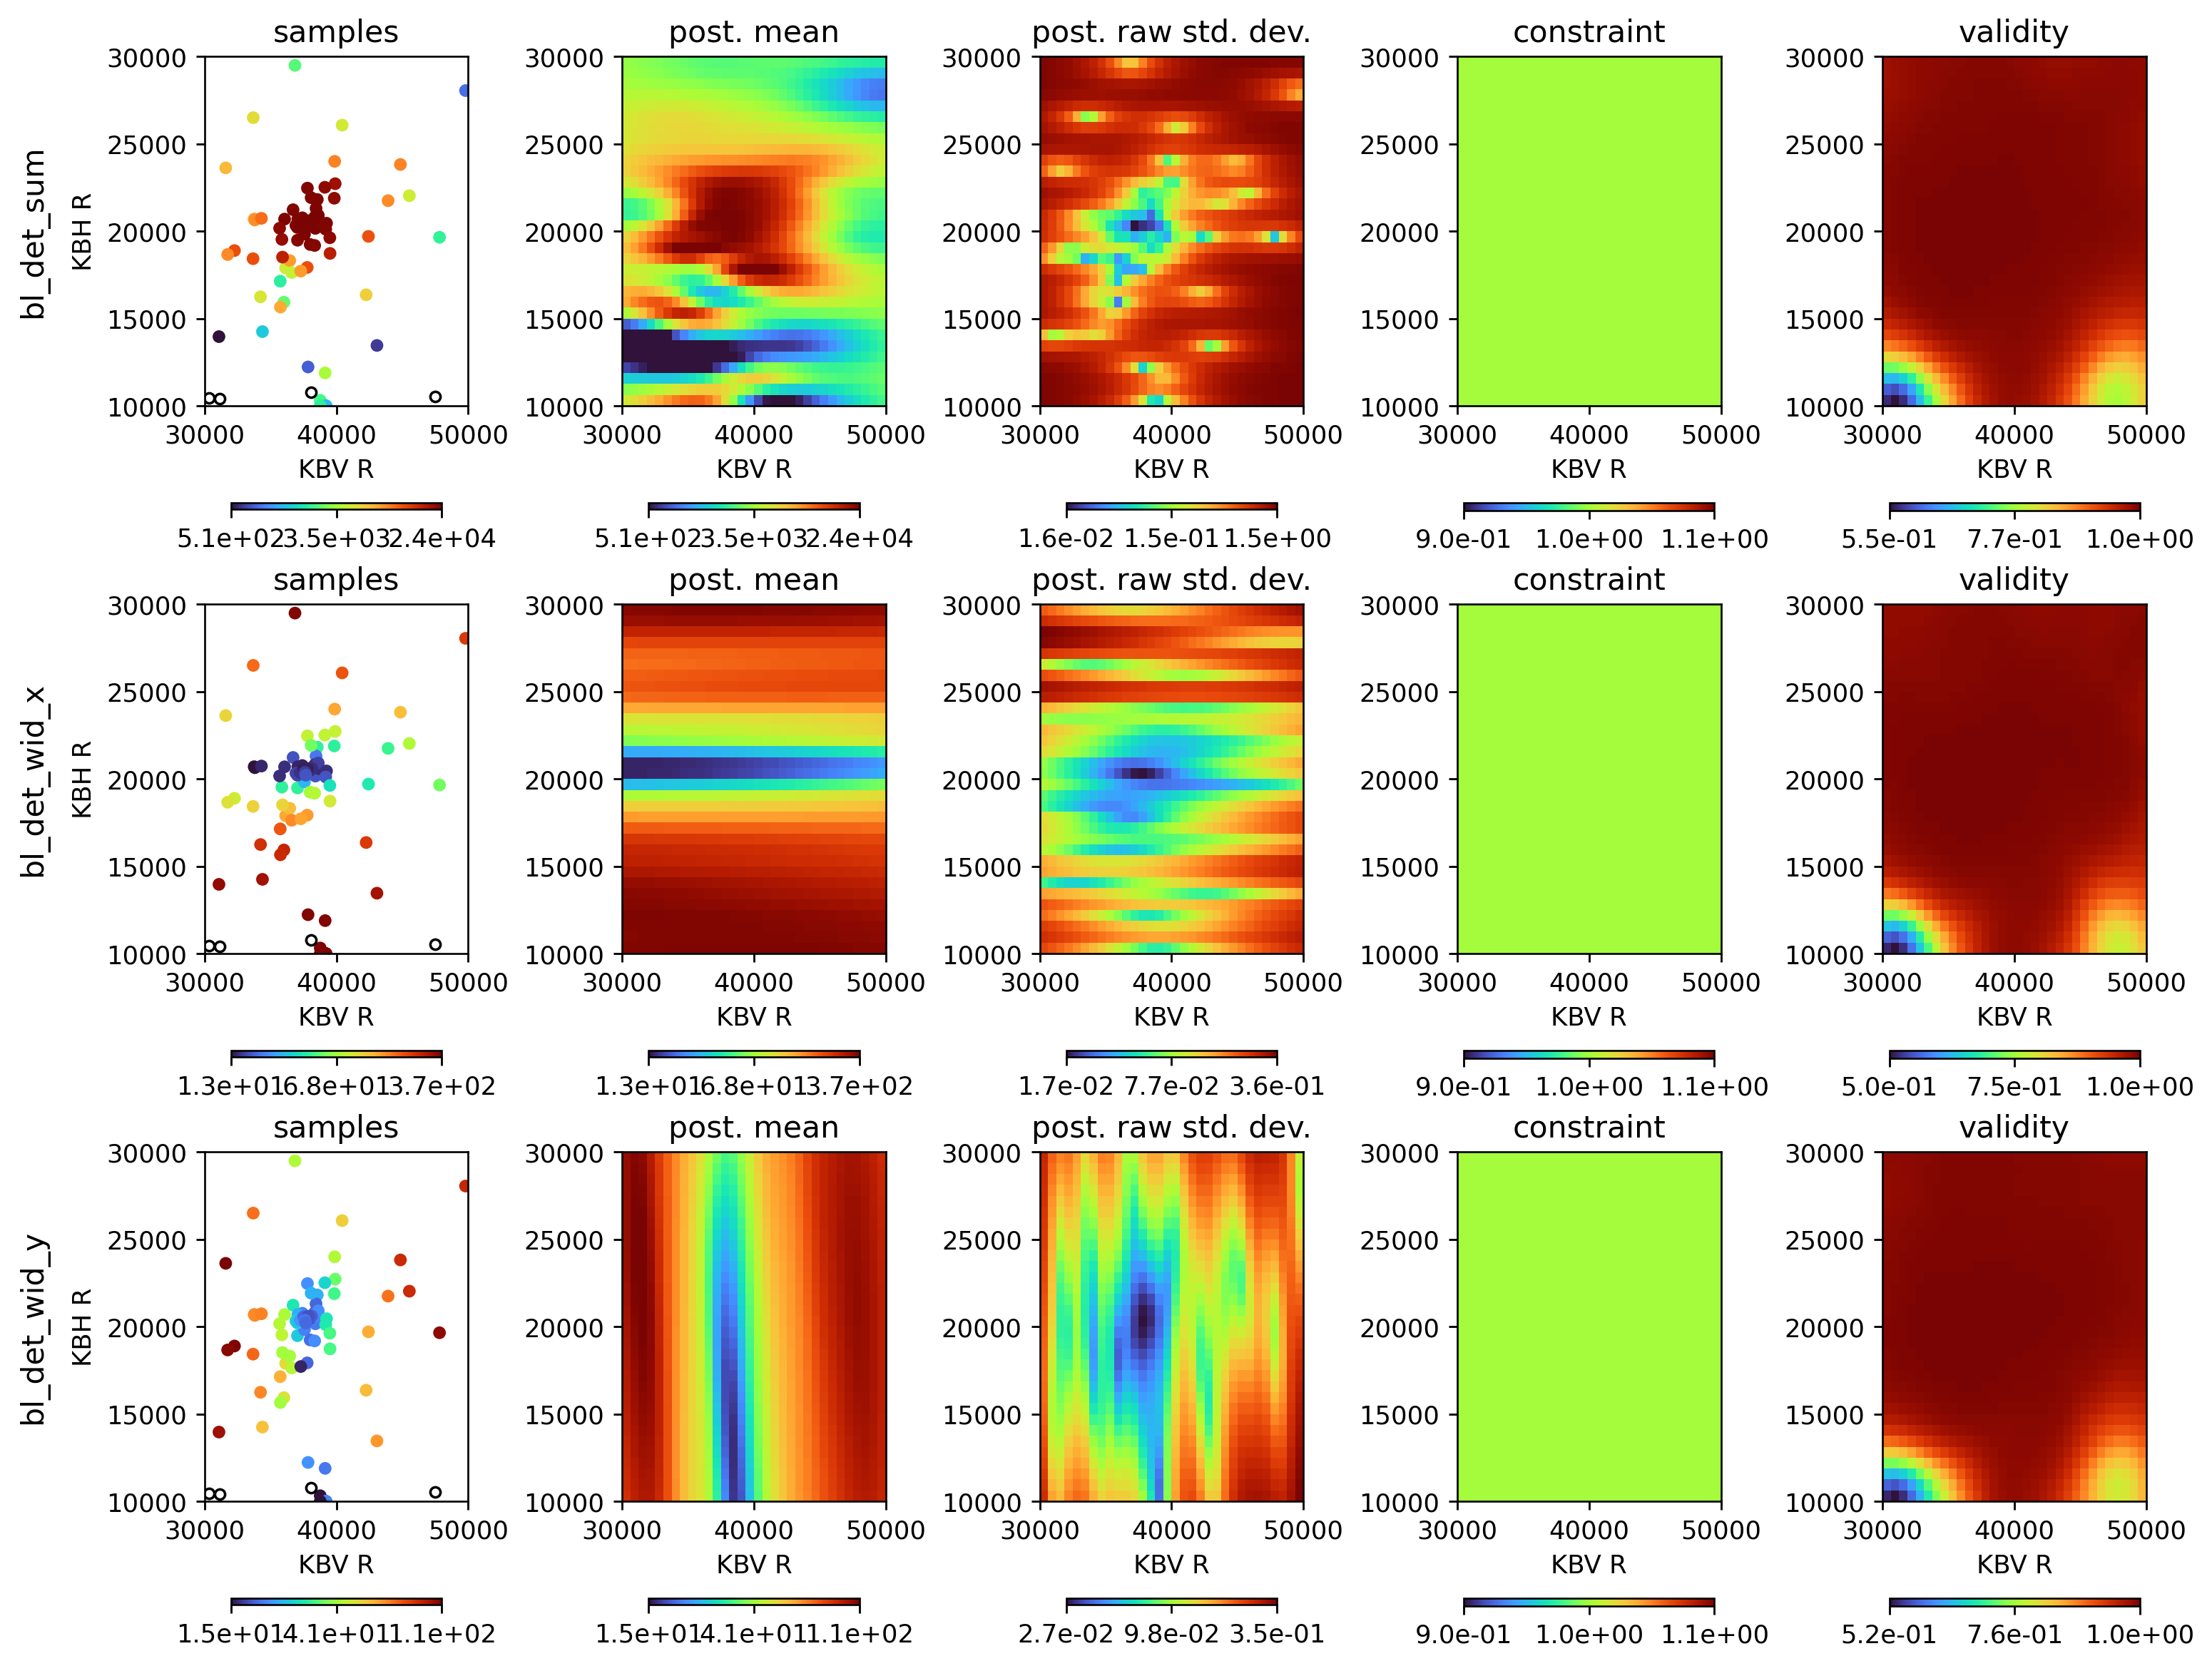

In [8]:
agent.plot_objectives(axes=(0, 1))